In [1]:
import praw
import json
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
client_id = 'JMN_WzJDCt11DQ'
client_secret = 'Pgg7kqIFDIWiwJOV69-qiiGxqx3XgQ'
user_agent = 'ScrAPI'
username = 'Phantonix'
password = '00Squirtle!'

In [3]:
reddit = praw.Reddit(client_id = 'JMN_WzJDCt11DQ',
                     client_secret = 'Pgg7kqIFDIWiwJOV69-qiiGxqx3XgQ',
                     user_agent = 'ScrAPI',
                     username = 'Phantonix',
                     password = '00Squirtle!')

In [4]:
subreddit = reddit.subreddit("all")
hot = subreddit.hot(limit = 500)
text = next(hot)

In [5]:
df = pd.DataFrame(columns = ['Title', 
                             'Subreddit',
                             'Upvote Ratio',
                             'Upvotes',
                             'Gildings',
                             'Comment Count',
                             'Is Video?',
                             'NSFW',
                             'Media Only?'
                             ])

for i in hot:
    df = df.append({'Title' : i.title, 
                    'Subreddit' : i.subreddit, 
                    'Upvote Ratio' : i.upvote_ratio,
                    'Upvotes' : i.ups,
                    'Gildings' : sum(i.gildings.values()),
                    'Comment Count' : i.num_comments,
                    'Is Video?' : i.is_video,
                    'NSFW' : i.over_18,
                    'Media Only?' : i.media_only
                    }, ignore_index = True)

In [6]:
df

,Title,Subreddit,Upvote Ratio,Upvotes,Gildings,Comment Count,Is Video?,NSFW,Media Only?
0,Happy Black History Month,gaming,0.91,45715,49,678,False,False,False
1,This woman from Myanmar was recording her aero...,PublicFreakout,0.96,43356,29,1694,True,False,False
2,My great grandmothers sketches of her teachers...,mildlyinteresting,0.95,17343,10,179,False,False,False
3,"Seriously, what am I missing?",WhitePeopleTwitter,0.91,42864,8,733,False,False,False
4,"In Alaska, nature greets YOU in the morning.",interestingasfuck,0.94,42681,25,623,False,False,False
...,...,...,...,...,...,...,...,...,...
494,Abramovich sent this letter to all Chelsea pla...,chelseafc,0.98,1400,2,150,False,False,False
495,Modeus flirting with Helltaker (art by @p36974...,Helltaker,0.99,1502,0,21,False,False,False
496,I hope you like my all natural curves ☺️,u_angelicfuckdoll,0.97,1460,1,50,False,True,False
497,Monika in a cape: Something I never knew I nee...,DDLC,0.99,3085,0,72,False,False,False


In [7]:
def numberfy(text):
    if text == False:
        return 0
    return 1

df['Is Video?'] = df['Is Video?'].apply(numberfy)

df['NSFW'] = df['NSFW'].apply(numberfy)

df['Media Only?'] = df['Media Only?'].apply(numberfy)

df_dummy = pd.get_dummies(df, columns = ['Subreddit'])

df_dummy = df_dummy.set_index('Title')

(0.0, 5.0)

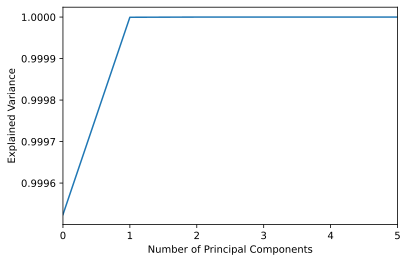

In [8]:
pca = PCA()

df_pca = pca.fit_transform(df_dummy)
exp_variances = pca.explained_variance_ratio_.cumsum()

plt.plot(exp_variances);
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.xlim([0, 5])

In [9]:
df_pca = df_pca[:,:2]
dists = pairwise_distances(df_pca, metric='cosine')

In [10]:
df_dists = pd.DataFrame(data=dists, index=df_dummy.index, columns=df_dummy.index)

In [21]:
for i in df['Title']:
    print(i)
    print('--------')

Happy Black History Month
--------
This woman from Myanmar was recording her aerobics class. Unbeknownst to her, she records the military Junta arriving to the parliament for a coup d'etat in the background
--------
My great grandmothers sketches of her teachers. 1924
--------
Seriously, what am I missing?
--------
In Alaska, nature greets YOU in the morning.
--------
Biden approves $230m for Covid home test kits that take 15 minutes and are 95% accurate
--------
I get home from work today and the $@&*# Mother in Law parked right in the middle of the god damn driveway again!
--------
TIL Judge Judy earns $47 MILLION a year for taping 'Judge Judy.' In an interview she said that every 3 years she would present her salary request to the CBS TV Distribution President. Once, when he gave her a counter offer in an envelope, she refused to open it saying "This isn't a negotiation."
--------
The Detroit Zoo just announced that after two lost pregnancies, Suka the Polar Bear gave birth to twin 

In [18]:
my_posts = ['Modeus flirting with Helltaker (art by @p36974195)', 'NYAHHH']
df_dists[my_posts]

Title,Modeus flirting with Helltaker (art by @p36974195),NYAHHH
Title,,
Happy Black History Month,1.999896e+00,1.999866
"This woman from Myanmar was recording her aerobics class. Unbeknownst to her, she records the military Junta arriving to the parliament for a coup d'etat in the background",1.999847e+00,1.999880
My great grandmothers sketches of her teachers. 1924,1.999257e+00,1.999179
"Seriously, what am I missing?",1.999932e+00,1.999907
"In Alaska, nature greets YOU in the morning.",1.999888e+00,1.999856
...,...,...
Abramovich sent this letter to all Chelsea players after Reece James suffered racist abuse,1.014226e-04,0.000132
Modeus flirting with Helltaker (art by @p36974195),0.000000e+00,0.000002
I hope you like my all natural curves ☺️,5.368109e-06,0.000014


In [19]:
my_sum = df_dists[my_posts].sum(axis=1)
my_sum = my_sum.sort_values(ascending=True)

my_mask = ~my_sum.index.isin(my_posts)
ranked_posts = my_sum.index[my_mask]
ranked_posts = ranked_posts.tolist()

ranked_posts[:10]

['Marble.',
 'The Yoga Teacher story 😳',
 'Live and let live',
 'Guys... 😳😳',
 'Egg🤞irl',
 'The creator of these, know as a talented animator for Bob’s Burgers, died in a skydiving accident recently. I thought this subreddit would appreciate his mini world works.',
 'Fruit Punch, me, Mixed Media, 2020',
 'Who DOESN’T get horny in the Home Depot light fixture aisle? [GIF]',
 "Techno's merch does not ship to Finland but I found this",
 'Pragmatic - practical as opposed to idealistic']